# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

Начнем с необходимых приготовлений.

In [136]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
!pip install seaborn
import seaborn as sns

%matplotlib inline

You should consider upgrading via the '/Users/daniil_goryunov/DataSpell_1/venv/bin/python -m pip install --upgrade pip' command.


#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [137]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [138]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


In [139]:
coins.describe()

,price,txCount,txVolume,activeAddresses,open,high,low,close,volume,market
count,37261.000000,3.606800e+04,3.575800e+04,3.606800e+04,37588.000000,37588.000000,37588.000000,37588.000000,3.758800e+04,3.758800e+04
mean,127.395042,1.960144e+04,4.745076e+53,3.295039e+04,125.652051,131.127449,119.791636,125.771519,1.302249e+08,2.720948e+09
std,859.109058,7.702995e+04,8.972837e+55,1.143196e+05,855.436562,890.527305,813.697042,855.954704,8.042239e+08,1.534546e+10
min,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,0.000003,0.000002,0.000002,0.000000e+00,0.000000e+00
25%,0.059871,3.410000e+02,2.751161e+05,2.920000e+02,0.053032,0.057809,0.049289,0.053147,8.794400e+04,1.356655e+07
50%,1.020000,1.214500e+03,2.007019e+06,1.388000e+03,1.000000,1.050000,1.000000,1.000000,1.949815e+06,1.323890e+08
75%,8.710000,6.247000e+03,1.425408e+07,1.173400e+04,8.772500,9.480000,8.150000,8.810000,1.770732e+07,5.156410e+08
max,19475.800000,1.349890e+06,1.696744e+58,1.283929e+06,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [140]:
f'Всего различных монет в датасете --> {len(set(coins.name))}'

'Всего различных монет в датасете --> 70'

### 2. За какой период данные мы имеем? (0.4 балла)

In [141]:
f'Данные представлены с {min(coins.date)} по {max(coins.date)}'

'Данные представлены с 2013-04-28 по 2018-06-06'

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [142]:
coins.isna().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Видно, что пропуски в колонках - price, txCount, txVolume, activeAddresses. Пропуски - значение nan

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [143]:
name = coins[coins['price'] == coins['price'].max()]['name'].values[0]
date = coins[coins['price'] == coins['price'].max()]['date'].values[0]
print(f'Наибольшая цена была у {name} -- {date}')

Наибольшая цена была у Bitcoin -- 2017-12-17


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [144]:
df = pd.DataFrame(coins)
data = {}
for i in set(coins['name']):
    data[i] = df.loc[df['name'] == i, 'market'].sum()
min_c = [i for i in data if data[i] == min(data.values())][0]
max_c = [i for i in data if data[i] == max(data.values())][0]
print(f'Максимальная суммарная капитализация у {min_c} и составляет -- {min(data.values())}')
print(f'Минимальная суммарная капитализация у {max_c} и составляет -- {max(data.values())}')

Максимальная суммарная капитализация у KingN Coin и составляет -- 10608251.0
Минимальная суммарная капитализация у Bitcoin и составляет -- 57439466431000.0


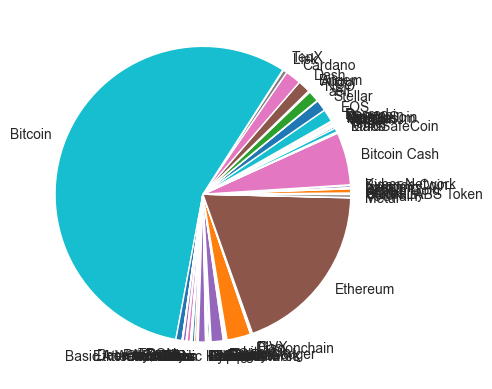

In [145]:
plt.pie(data.values(), labels = data.keys())
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [146]:
!pip install plotly
import plotly.graph_objects as go


You should consider upgrading via the '/Users/daniil_goryunov/DataSpell_1/venv/bin/python -m pip install --upgrade pip' command.


In [147]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coins = coins[(coins.date >= start_date) & (coins.date <= end_date) & (coins.symbol == symbol)]

    fig = go.Figure(
        data=go.Ohlc(
            x=coins.date,
            open=coins["open"],
            high=coins["high"],
            low=coins["low"],
            close=coins["close"],
        )
    )
    fig.update_layout(
        autosize=False,
        width=800,
        height=800,)
    fig.show()

Посмотрим, что получилось:

In [148]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2017-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [149]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    df = pd.DataFrame(coins)
    df = df[(df['close'] != 0) & (df['open'] != 0) & (df['symbol'] == symbol) & (df['date'] >= start_date) & (df['date'] <= end_date)]
    return max(max(df["high"] / df["close"]), max(df["high"] / df["open"]))

In [150]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

1.2779033345228183

Сравните эти значения для разных монет:

In [151]:
res = {}
for i in set(coins.symbol):
    res[i] = find_most_severe_pump_and_dump(coins, symbol=i, start_date='2000-01-01', end_date='2020-01-01')
print(*res.items(), sep='\n')

('AION', 2.679802955665025)
('BTM', 7.824307189844705)
('SRN', 2.3633608172501708)
('BTC', 1.4172540174795603)
('LRC', 5.960320253387295)
('ZRX', 2.5064309688968445)
('CVC', 2.10545071023046)
('DCR', 2.062196307094266)
('DOGE', 4.224390243902439)
('USDT', 1.1862745098039216)
('POLY', 1.6191709844559585)
('GAS', 2.5554502369668244)
('SNT', 2.1613467310452825)
('BTG', 9.860204081632652)
('MANA', 3.70996233277049)
('GNO', 1.7436943620178043)
('ICX', 1.8331943411394354)
('XEM', 2.7943949489018793)
('EOS', 2.8900544996041226)
('NEO', 3.4440883989703166)
('VTC', 2.8682209902294433)
('ENG', 2.348993288590604)
('OMG', 1.8651026392961878)
('LSK', 12.445272938941384)
('PAY', 66.41818181818182)
('QASH', 1.7916514564050503)
('VERI', 332514.7928994083)
('AE', 3.392159762026946)
('ADA', 2.6020226760952876)
('VEN', 2.2615748504050974)
('CENNZ', 1.5338419793705267)
('TRX', 10.143168921868181)
('ZEC', 3.8843950885428526)
('ETHOS', 2.316378342392114)
('REP', 2.2225705329153604)
('WAVES', 2.197641198447)

#### Построим круговую диаграмму

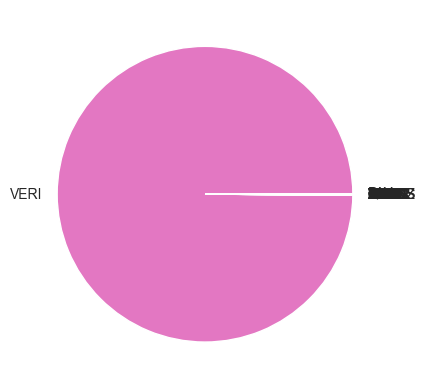

In [152]:
plt.pie(res.values(), labels = res.keys())
plt.show()

Отсюда видно, что монета VERI - является самым сильным pump’n’dump

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [153]:
def compute_roi(coins, investments, start_date, end_date):
    delta = 0
    start_cap = 0
    df = pd.DataFrame(coins)
    for k, v in investments.items():
        start_cap += df.loc[(df['symbol'] == k) & (df['date'] == start_date), 'price'].sum() * v
        delta += (df.loc[(df['symbol'] == k) & (df['date'] == end_date), 'price'].sum() -
        df.loc[(df['symbol'] == k) & (df['date'] == start_date), 'price'].sum()) * v
    return delta / start_cap


In [154]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721981

In [155]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [156]:
def plot_bollinger_bands(coins, symbol, window, width):
    df = pd.DataFrame(coins)
    df['rolling'] = df.loc[df['symbol'] == symbol, 'price'].rolling(window).mean().shift(-3)
    df['stand_deviation'] = df.loc[df['symbol'] == symbol, 'price'].rolling(window).std().shift(-3)
    df['lower_bound'] = df.loc[df['symbol'] == symbol, 'rolling'] - width * df.loc[df['symbol'] == symbol, 'stand_deviation']
    df['upper_bound'] = df.loc[df['symbol'] == symbol, 'rolling'] + width * df.loc[df['symbol'] == symbol, 'stand_deviation']
    sns.set_style("darkgrid")
    sns.despine()
    fig = plt.figure(figsize=(15,9))
    plot = sns.lineplot(data=df.loc[df['symbol'] == symbol], x="date", y='price', label=f'Зависимость стоимости {symbol} от времени')
    sns.lineplot(data=df.loc[df['symbol'] == symbol], x="date", y="rolling", label=f"Скользящее среднее за {window} дней")
    sns.lineplot(data=df.loc[df['symbol'] == symbol], x="date", y="lower_bound", label="Нижняя граница Боллинджера")
    plot3 = sns.lineplot(data=df.loc[df['symbol'] == symbol], x="date", y="upper_bound", label="Верхняя граница Боллинджера")
    line = plot3.get_lines()
    plt.fill_between(line[1].get_xdata(), line[2].get_ydata(), line[3].get_ydata(), color='lightblue', alpha=.5)
    plot.xaxis.set_major_locator(mpl.ticker.LinearLocator(8))
    plt.title('Границы Боллинджера')

<Figure size 640x480 with 0 Axes>

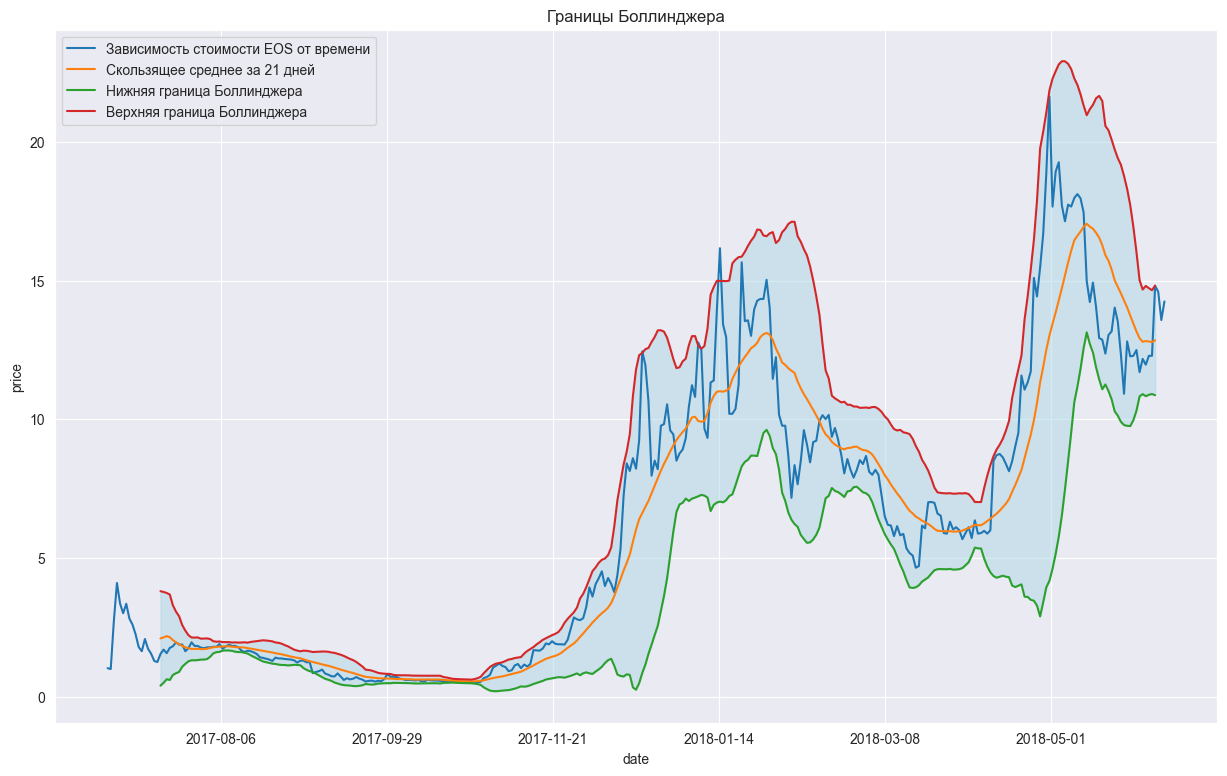

In [157]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

Можно заметить, что при касании границы, прямая сразу разворачивается. Следовательно, правило выполняется

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [158]:
from datetime import datetime

In [159]:
def plot_coins_capitalizations(coins, symbols, start_date):
    df = pd.DataFrame(coins)
    sns.set_style('darkgrid')

    fig, axs = plt.subplots(3, 2)
    plot1 = sns.lineplot(data=df.loc[(df['symbol'] == symbols[0]) & (df['date'] >= start_date)], x='date', y='market', ax=axs[0][0], label=symbols[0])
    plot2 = sns.lineplot(data=df.loc[(df['symbol'] == symbols[1]) & (df['date'] >= start_date)], x='date', y='market', ax=axs[0][1], label=symbols[1])
    plot3 = sns.lineplot(data=df.loc[(df['symbol'] == symbols[2]) & (df['date'] >= start_date)], x='date', y='market', ax=axs[1][0], label=symbols[2])
    plot4 = sns.lineplot(data=df.loc[(df['symbol'] == symbols[3]) & (df['date'] >= start_date)], x='date', y='market', ax=axs[1][1], label=symbols[3])
    plot5 = sns.lineplot(data=df.loc[(df['symbol'] == symbols[4]) & (df['date'] >= start_date)], x='date', y='market', ax=axs[2][0], label=symbols[4])
    plot6 = sns.lineplot(data=df.loc[(df['symbol'] == symbols[5]) & (df['date'] >= start_date)], x='date', y='market', ax=axs[2][1], label=symbols[5])

    plt.figure(figsize=(15,9))

    plot1.xaxis.set_major_locator(mpl.ticker.LinearLocator(4))
    plot2.xaxis.set_major_locator(mpl.ticker.LinearLocator(4))
    plot3.xaxis.set_major_locator(mpl.ticker.LinearLocator(4))
    plot4.xaxis.set_major_locator(mpl.ticker.LinearLocator(4))
    plot5.xaxis.set_major_locator(mpl.ticker.LinearLocator(4))
    plot6.xaxis.set_major_locator(mpl.ticker.LinearLocator(4))

    df['new_col'] = df.loc[(df['symbol'] == symbols[0]), 'market'] + df.loc[(df['symbol'] == symbols[1]), 'market'] +\
                    df.loc[(df['symbol'] == symbols[2]), 'market'] + df.loc[(df['symbol'] == symbols[3]), 'market'] +\
                    df.loc[(df['symbol'] == symbols[4]), 'market'] + df.loc[(df['symbol'] == symbols[5]), 'market']

    pl = sns.lineplot(data=df.loc[df['date'] >= start_date], x='date', y='market')
    pl.xaxis.set_major_locator(mpl.ticker.LinearLocator(8))


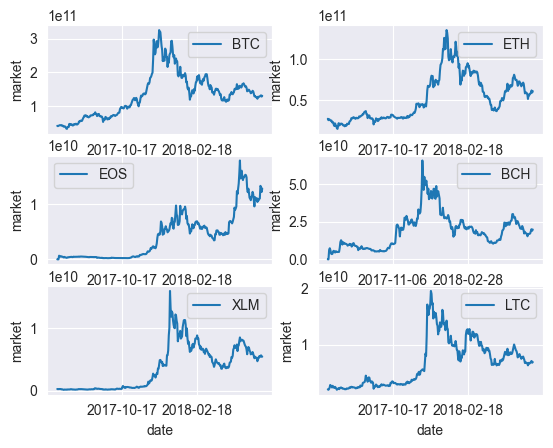

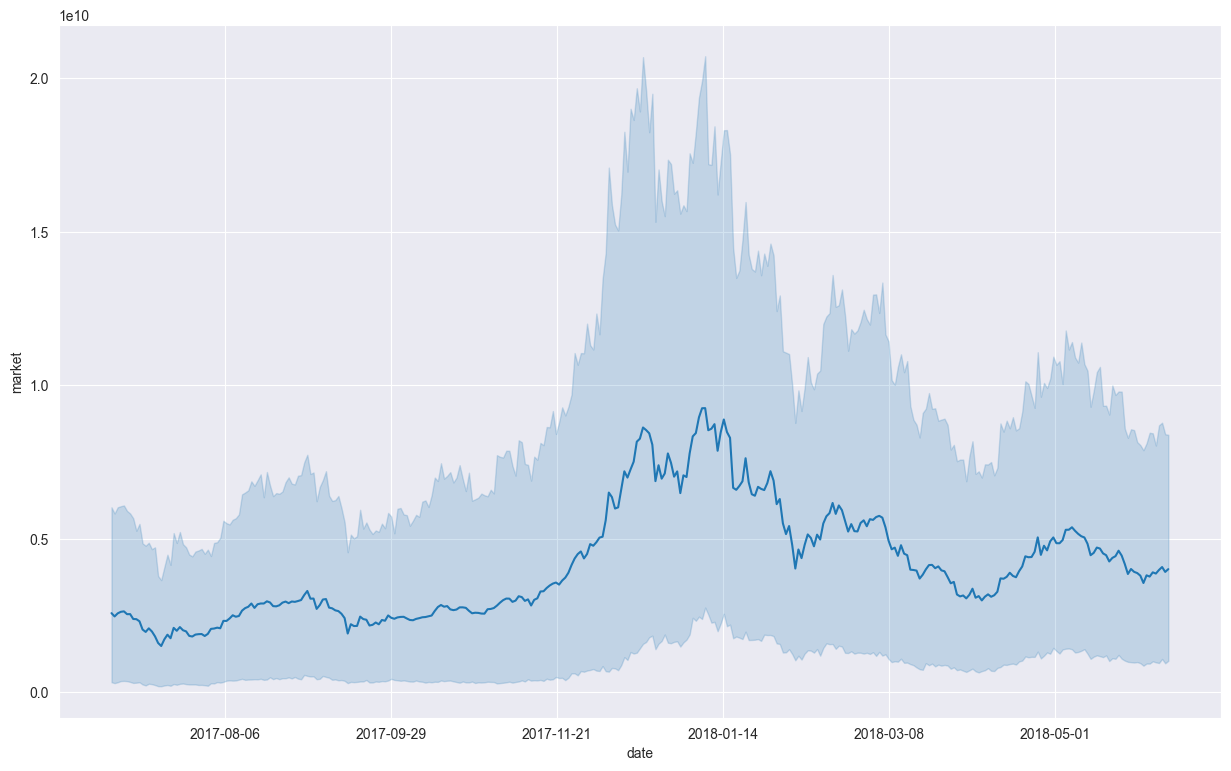

In [160]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [161]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

SyntaxError: incomplete input (3410167829.py, line 2)

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.